# scikit-learn中的多项式回归和Pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
poly = PolynomialFeatures(degree=2) # degree=2意思是升维到2次幂
poly.fit(X)
X2 = poly.transform(X)

In [5]:
X2.shape

(100, 3)

In [6]:
X2[:5,:] # 三列分别对应x的0次方，x的1次方，x的2次方

array([[ 1.        , -0.94985487,  0.90222428],
       [ 1.        , -2.05821028,  4.23622955],
       [ 1.        ,  2.23138499,  4.97907895],
       [ 1.        , -2.72024281,  7.39972096],
       [ 1.        , -2.48029634,  6.15186993]])

In [7]:
X[:5,:]

array([[-0.94985487],
       [-2.05821028],
       [ 2.23138499],
       [-2.72024281],
       [-2.48029634]])

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2,y)
y_predict2 = lin_reg2.predict(X2)

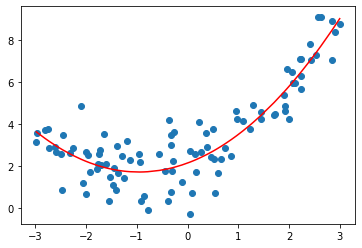

In [9]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict2[np.argsort(x)],color='r')
plt.show()

In [10]:
lin_reg2.coef_

array([0.        , 0.89583391, 0.46849154])

In [11]:
lin_reg2.intercept_

2.1416777257866793

### 关于PolynomialFeatures

In [12]:
X = np.arange(1,11).reshape(5,2)

In [13]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [14]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [15]:
X2.shape

(5, 6)

In [16]:
poly2 = PolynomialFeatures(degree=3)
poly2.fit(X)
X3 = poly2.transform(X)

In [19]:
X3.shape

(5, 10)

### Pipeline

In [33]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,size=100)

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ('poly',PolynomialFeatures(degree=2)),
    ('std_scaler',StandardScaler()),
    ('lin_reg',LinearRegression())
])

In [35]:
poly_reg.fit(X,y)
y_predict = poly_reg.predict(X)

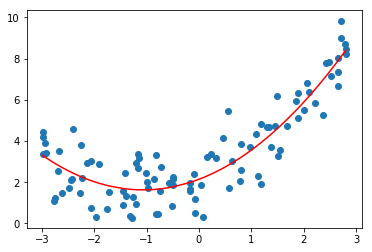

In [36]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color='r')
plt.show()